In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 98% 146M/149M [00:01<00:00, 127MB/s]
100% 149M/149M [00:01<00:00, 130MB/s]


In [7]:
def get_class_paths(path):
  classes = []
  class_paths = []

  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    if os.path.isdir(label_path):
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

        classes.append(label)
        class_paths.append(image_path)

  df = pd.DataFrame({
      'Class Path': class_paths,
      'Class': classes
  })

  return df

In [8]:
tr_df = get_class_paths("/content/Training")

In [9]:
tr_df

,Class Path,Class
0,/content/Training/pituitary/Tr-pi_1163.jpg,pituitary
1,/content/Training/pituitary/Tr-pi_0957.jpg,pituitary
2,/content/Training/pituitary/Tr-pi_0839.jpg,pituitary
3,/content/Training/pituitary/Tr-pi_0597.jpg,pituitary
4,/content/Training/pituitary/Tr-pi_0331.jpg,pituitary
...,...,...
5707,/content/Training/meningioma/Tr-me_1250.jpg,meningioma
5708,/content/Training/meningioma/Tr-me_0908.jpg,meningioma
5709,/content/Training/meningioma/Tr-me_1004.jpg,meningioma
5710,/content/Training/meningioma/Tr-me_1288.jpg,meningioma


In [10]:
ts_df = get_class_paths("/content/Testing")

In [11]:
ts_df

,Class Path,Class
0,/content/Testing/pituitary/Te-pi_0151.jpg,pituitary
1,/content/Testing/pituitary/Te-pi_0112.jpg,pituitary
2,/content/Testing/pituitary/Te-pi_0210.jpg,pituitary
3,/content/Testing/pituitary/Te-pi_0087.jpg,pituitary
4,/content/Testing/pituitary/Te-pi_0171.jpg,pituitary
...,...,...
1306,/content/Testing/meningioma/Te-me_0190.jpg,meningioma
1307,/content/Testing/meningioma/Te-me_0222.jpg,meningioma
1308,/content/Testing/meningioma/Te-me_0113.jpg,meningioma
1309,/content/Testing/meningioma/Te-me_0084.jpg,meningioma


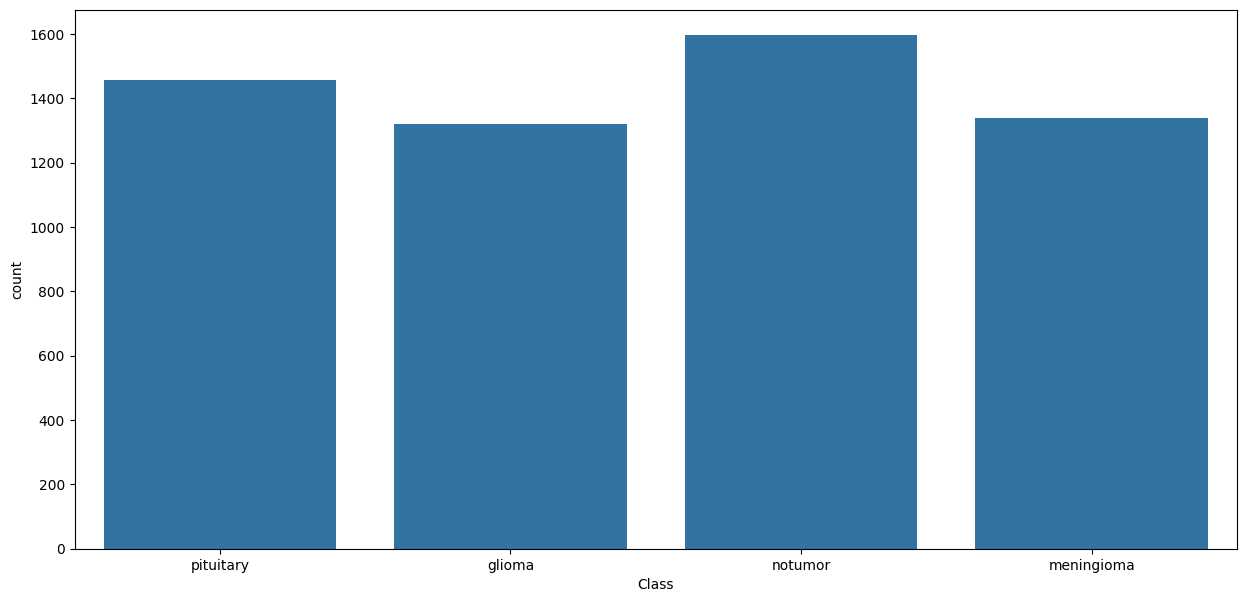

In [12]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

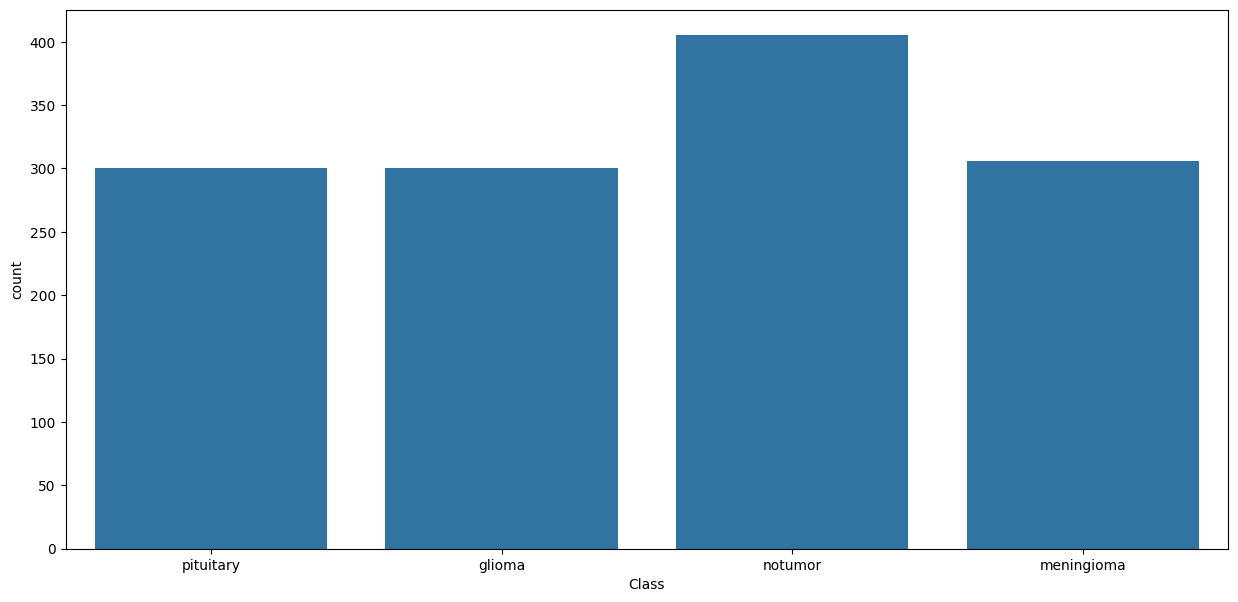

In [13]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
# Stratify keeps the proportion of classes the same in both dataframes
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df['Class'])

In [17]:
valid_df

,Class Path,Class
1235,/content/Testing/meningioma/Te-me_0185.jpg,meningioma
80,/content/Testing/pituitary/Te-pi_0218.jpg,pituitary
920,/content/Testing/notumor/Te-no_0284.jpg,notumor
530,/content/Testing/glioma/Te-gl_0270.jpg,glioma
878,/content/Testing/notumor/Te-no_0134.jpg,notumor
...,...,...
572,/content/Testing/glioma/Te-gl_0290.jpg,glioma
356,/content/Testing/glioma/Te-gl_0173.jpg,glioma
284,/content/Testing/pituitary/Te-pi_0014.jpg,pituitary
734,/content/Testing/notumor/Te-no_0081.jpg,notumor


In [18]:
ts_df

,Class Path,Class
1302,/content/Testing/meningioma/Te-me_0125.jpg,meningioma
1301,/content/Testing/meningioma/Te-me_0204.jpg,meningioma
449,/content/Testing/glioma/Te-gl_0201.jpg,glioma
903,/content/Testing/notumor/Te-no_0172.jpg,notumor
335,/content/Testing/glioma/Te-gl_0039.jpg,glioma
...,...,...
1231,/content/Testing/meningioma/Te-me_0027.jpg,meningioma
1233,/content/Testing/meningioma/Te-me_0248.jpg,meningioma
301,/content/Testing/glioma/Te-gl_0172.jpg,glioma
355,/content/Testing/glioma/Te-gl_0035.jpg,glioma
